In [1]:
# Study of Height versus Weight

In [2]:
library(ggplot2)
library(reshape2)
library(plyr)

In [3]:
ht_weight_df <- read.csv(file = "/home/jovyan/weight-height.csv")
# str is short for structure(). It reports what's in the data.frame
str(ht_weight_df)

'data.frame':	10000 obs. of  3 variables:
 $ Gender: Factor w/ 2 levels "Female","Male": 2 2 2 2 2 2 2 2 2 2 ...
 $ Height: num  73.8 68.8 74.1 71.7 69.9 ...
 $ Weight: num  242 162 213 220 206 ...


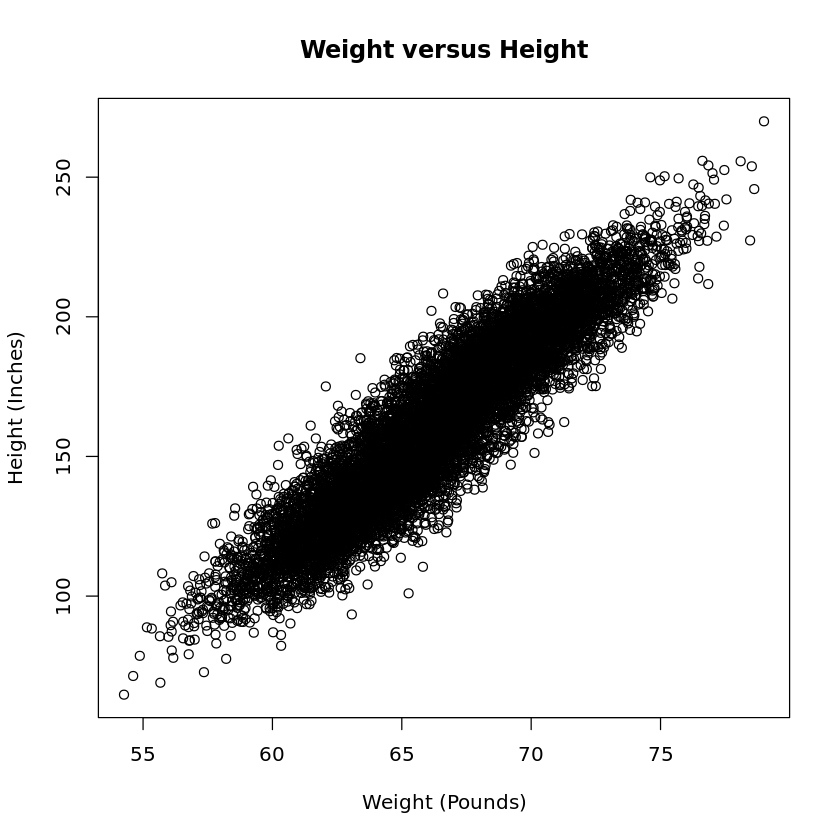

In [4]:
plot(x = ht_weight_df$Height, y = ht_weight_df$Weight,xlab="Weight (Pounds)",ylab="Height (Inches)",main='Weight versus Height')

In [5]:
lm_ht_weight <- lm(Weight ~ Height, data = ht_weight_df)
summary(lm_ht_weight)


Call:
lm(formula = Weight ~ Height, data = ht_weight_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-51.934  -8.236  -0.119   8.260  46.844 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -350.73719    2.11149  -166.1   <2e-16 ***
Height         7.71729    0.03176   243.0   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.22 on 9998 degrees of freedom
Multiple R-squared:  0.8552,	Adjusted R-squared:  0.8552 
F-statistic: 5.904e+04 on 1 and 9998 DF,  p-value: < 2.2e-16


In [6]:
# Subset the full data.frame by genders
male_df <- subset(ht_weight_df, Gender == "Male")
female_df <- subset(ht_weight_df, Gender == "Female")
# Get the summary values of height
summary(male_df$Height)
summary(female_df$Height)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  58.41   67.17   69.03   69.03   70.99   79.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  54.26   61.89   63.73   63.71   65.56   73.39 

In [7]:
ddply(ht_weight_df, .(Gender), function(df) summary(df$Height))

Gender,Min.,1st Qu.,Median,Mean,3rd Qu.,Max.
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Female,54.26313,61.89444,63.73092,63.70877,65.56357,73.38959
Male,58.40690,67.17468,69.02771,69.02635,70.98874,78.99874


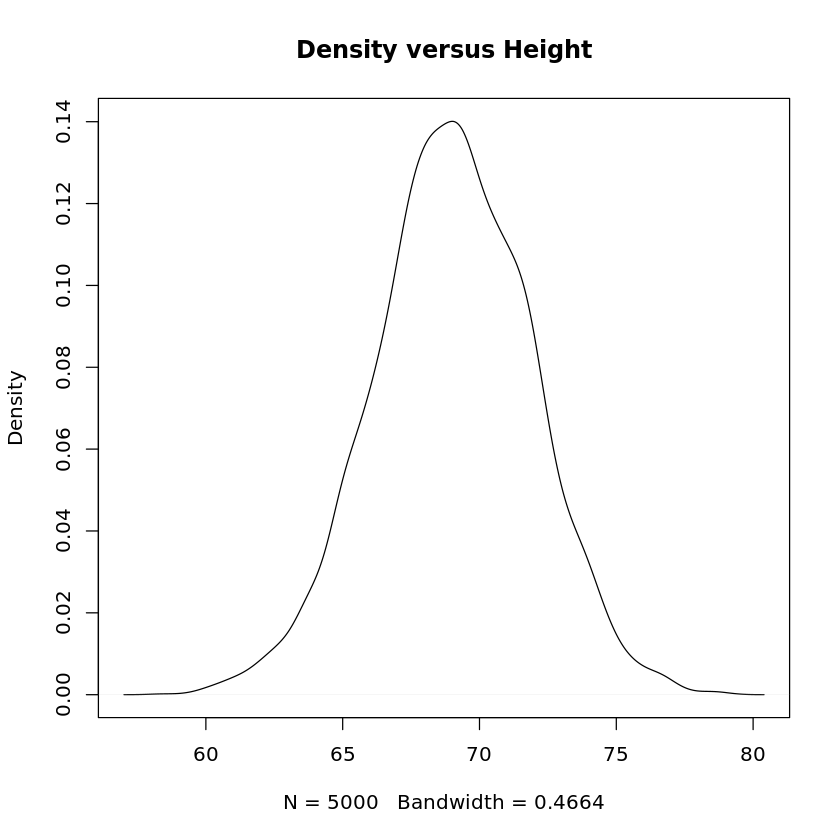

In [8]:
plot(density(male_df$Height), main='Density versus Height')

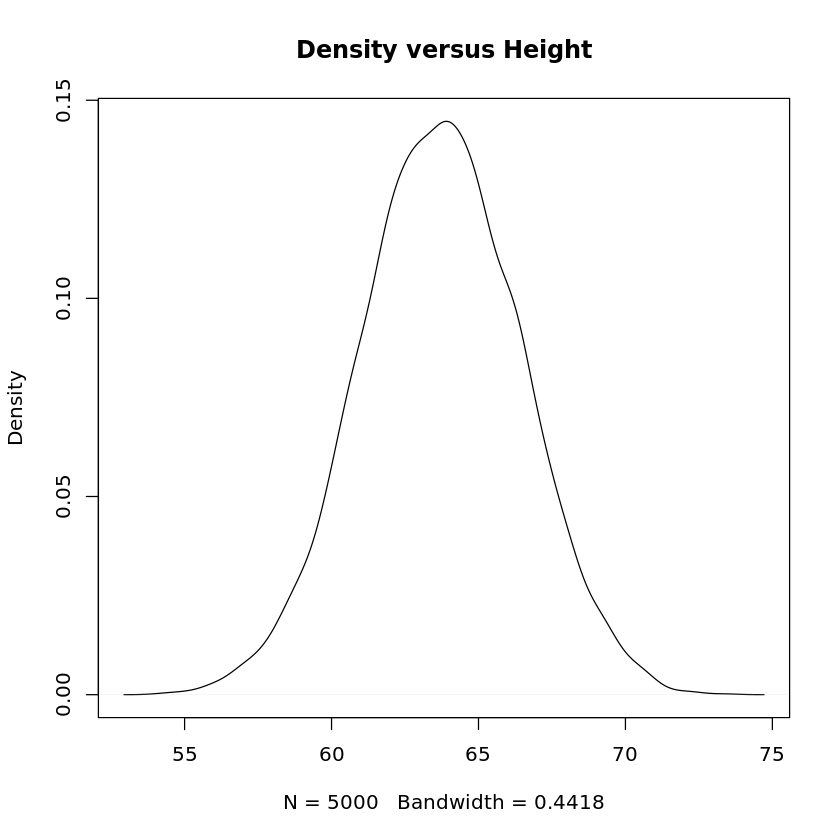

In [9]:
plot(density(female_df$Height), main='Density versus Height')

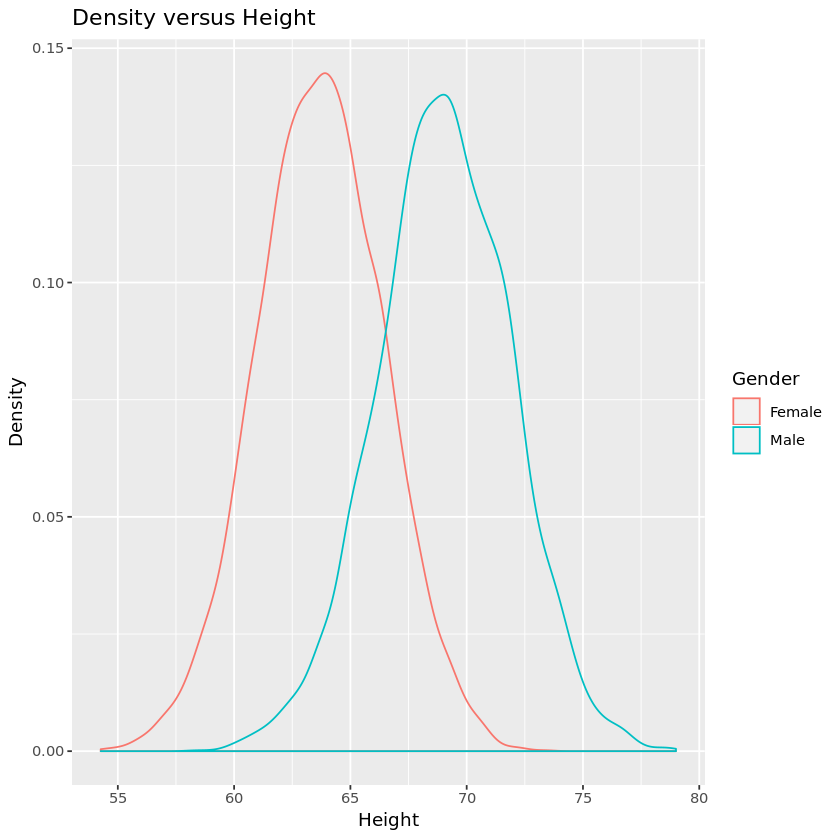

In [10]:
dens_by_gender <- ggplot(data = ht_weight_df, aes(x = Height, color = Gender)) + 
    geom_density() + ggtitle("Density versus Height")  + ylab("Density")
dens_by_gender

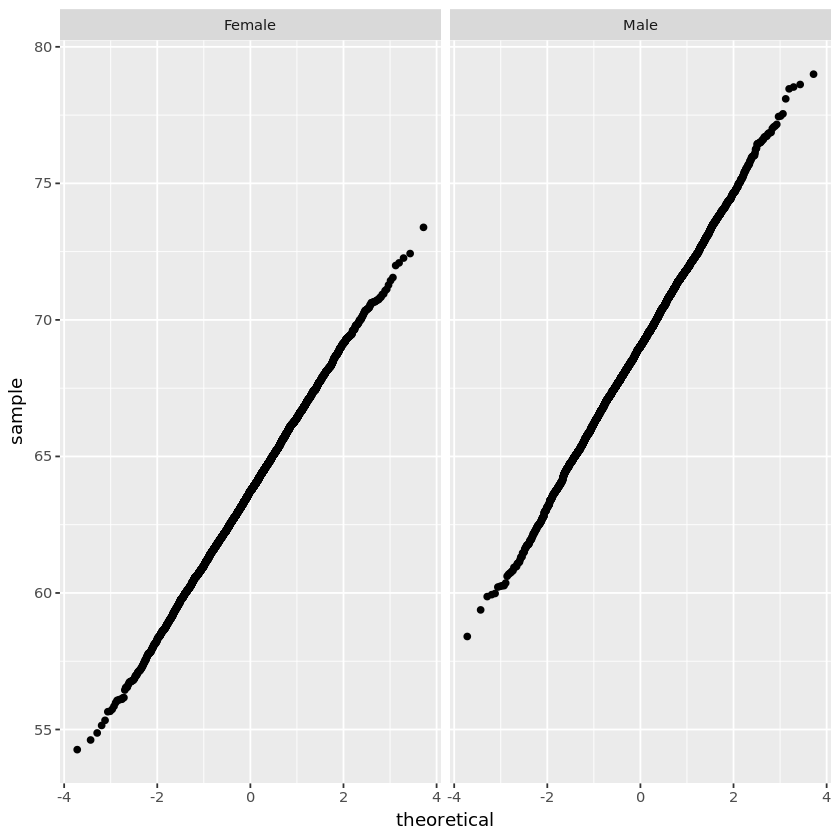

In [11]:
qq_by_gender <- ggplot(data = ht_weight_df, aes(sample = Height)) + geom_point(stat = "qq") + 
    facet_wrap(~Gender)
qq_by_gender

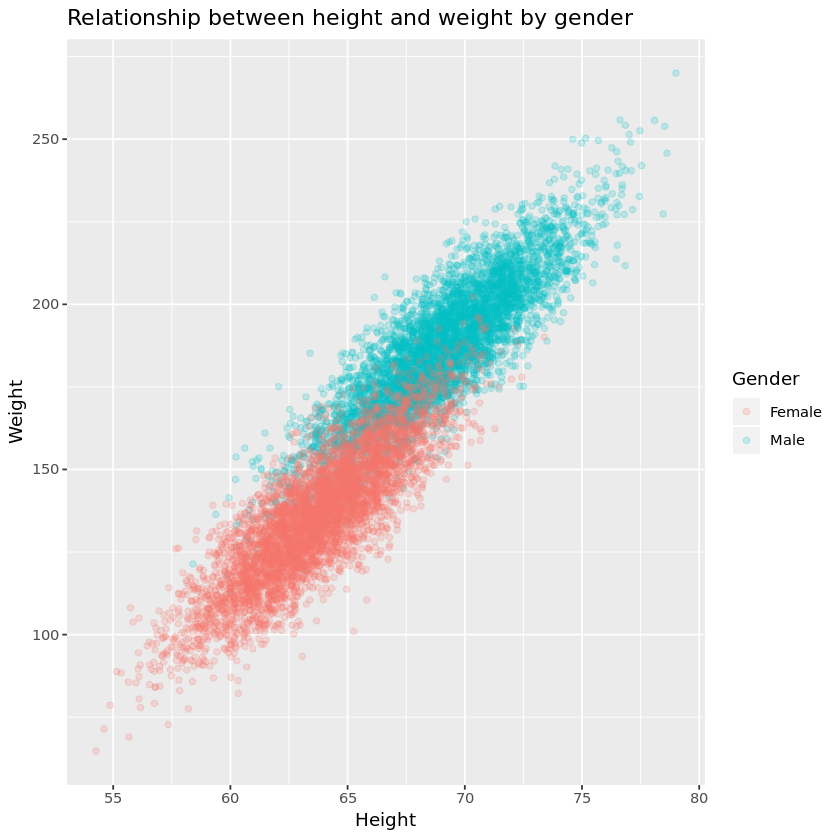

In [12]:
ht_wt_pt_gender <- ggplot(data = ht_weight_df, aes(x = Height, y = Weight, color = Gender)) + 
    geom_point(alpha = 0.2) + ggtitle("Relationship between height and weight by gender")
ht_wt_pt_gender

In [13]:
lm_ht_wt_by_gender <- lm(Weight ~ Height * Gender, data = ht_weight_df)
summary(lm_ht_wt_by_gender)


Call:
lm(formula = Weight ~ Height * Gender, data = ht_weight_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-44.194  -6.796  -0.118   6.814  35.813 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -246.01327    3.34973 -73.443  < 2e-16 ***
Height               5.99405    0.05253 114.103  < 2e-16 ***
GenderMale          21.51443    4.78534   4.496 7.01e-06 ***
Height:GenderMale   -0.03227    0.07216  -0.447    0.655    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10.01 on 9996 degrees of freedom
Multiple R-squared:  0.9028,	Adjusted R-squared:  0.9027 
F-statistic: 3.093e+04 on 3 and 9996 DF,  p-value: < 2.2e-16
